In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()  # เลือกไฟล์ `kaggle.json` จากเครื่องของคุณ


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nattakanlamtem","key":"ff4745c67bc73c10690ff47d4ff7a660"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # ตั้ง permission ให้กับไฟล์


In [ ]:
!kaggle competitions download -c titanic


  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 44.9MB/s]


In [ ]:
!unzip titanic.zip


Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()  # ดูข้อมูลตัวอย่าง

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#check number of column
df.shape

(891, 12)

In [ ]:
# ตรวจสอบค่า missing values ในแต่ละคอลัมน์
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# เติมค่าที่หายไปในคอลัมน์ Age ด้วยค่าเฉลี่ย
df['Age'].fillna(df['Age'].mean(), inplace=True)

# ลบคอลัมน์ Cabin เพราะมี missing values เยอะ
df.drop(columns=['Cabin'], inplace=True)

# เติมค่าที่หายไปใน Embarked ด้วยค่า Mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


<ipython-input-9-c938d31e5913>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-9-c938d31e5913>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
# ตรวจสอบข้อมูลซ้ำ
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# ลบข้อมูลซ้ำออก
df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


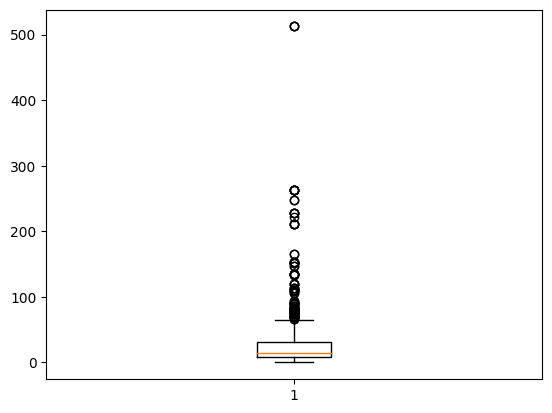

In [ ]:
import matplotlib.pyplot as plt

# ดูการกระจายตัวของค่าที่อาจเป็น outliers ในคอลัมน์ Fare
plt.boxplot(df['Fare'])
plt.show()



In [ ]:
# ลบ outliers ออก (ถ้ามี)
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


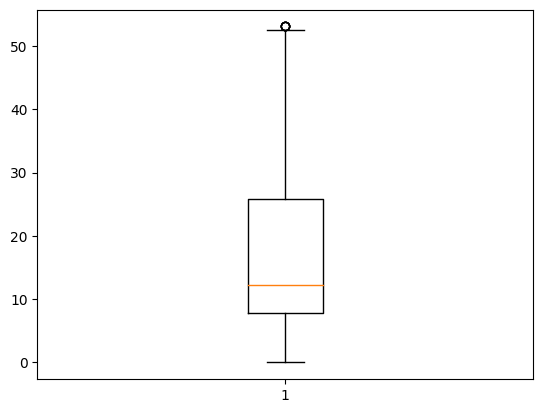

In [ ]:
plt.boxplot(df['Fare'])
plt.show()

In [ ]:
# แปลงค่าเพศเป็นตัวเลข (male = 0, female = 1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [ ]:
df.info()  # ตรวจสอบข้อมูลอีกครั้ง


<class 'pandas.core.frame.DataFrame'>
Index: 750 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  750 non-null    int64  
 1   Survived     750 non-null    int64  
 2   Pclass       750 non-null    int64  
 3   Name         750 non-null    object 
 4   Sex          750 non-null    int64  
 5   Age          750 non-null    float64
 6   SibSp        750 non-null    int64  
 7   Parch        750 non-null    int64  
 8   Ticket       750 non-null    object 
 9   Fare         750 non-null    float64
 10  Embarked     750 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 70.3+ KB


In [ ]:
#บันทึกข้อมูลที่ทำความสะอาดแล้ว:
df.to_csv('cleaned_titanic_data.csv', index=False)


# สิ่งที่เราทำในขั้นตอนนี้:
*   ทำการตรวจสอบค่าที่หายไป (missing values) และเติมค่า
*   ตรวจสอบและลบข้อมูลที่ซ้ำซ้อน
*   ลบ outliers ออก
*   แปลงค่าตัวแปรที่จำเป็น







# Exploratory Data Analysis (EDA)

# 1. การแจกแจงข้อมูล (Univariate Analysis)
เราจะเริ่มจากการวิเคราะห์ตัวแปรแต่ละตัวแยกกัน เพื่อดูการกระจายตัวของข้อมูล เช่น ค่าทางสถิติพื้นฐาน และการแสดงผลด้วยกราฟ เช่น histogram

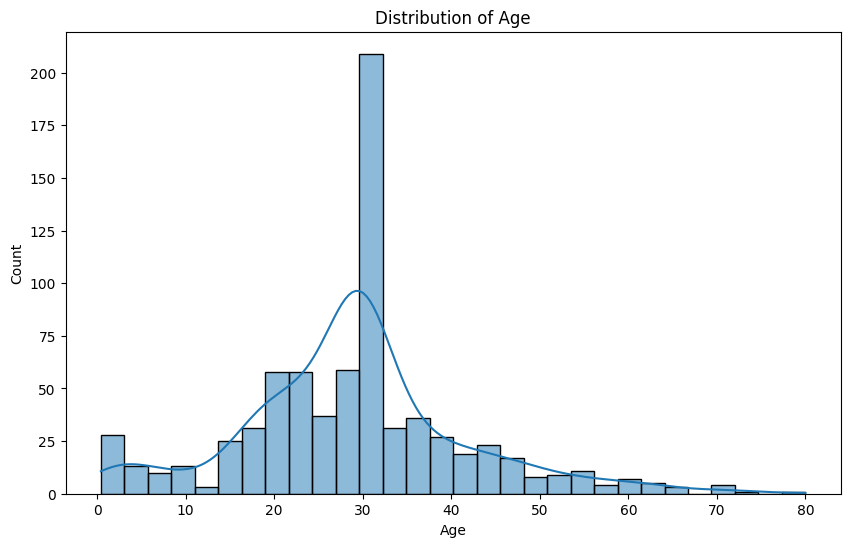

In [ ]:
# วิเคราะห์ตัวเเปร Age
import matplotlib.pyplot as plt
import seaborn as sns

# การแสดงการกระจายตัวของอายุ
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()


กราฟที่แสดงคือ **ฮิสโตแกรม** (Histogram) ที่แสดงถึงการกระจายตัวของอายุ (Age) ของผู้โดยสารบนเรือไททานิก

**อธิบาย:**

* แกน x แสดงช่วงอายุ (Age) โดยแบ่งเป็นช่วงๆ (bins)
* แกน y แสดงถึงจำนวนผู้โดยสารในแต่ละช่วงอายุ
* เส้นโค้งสีเหลือง (KDE) แสดงถึงความหนาแน่นของการกระจายตัวของอายุ

**จากกราฟ:**

* เราสามารถสังเกตเห็นว่าอายุของผู้โดยสารส่วนใหญ่อยู่ในช่วงประมาณ 20-40 ปี
* มีผู้โดยสารจำนวนมากในช่วงอายุ 20-30 ปี
* มีผู้โดยสารจำนวนน้อยในช่วงอายุมากกว่า 60 ปี


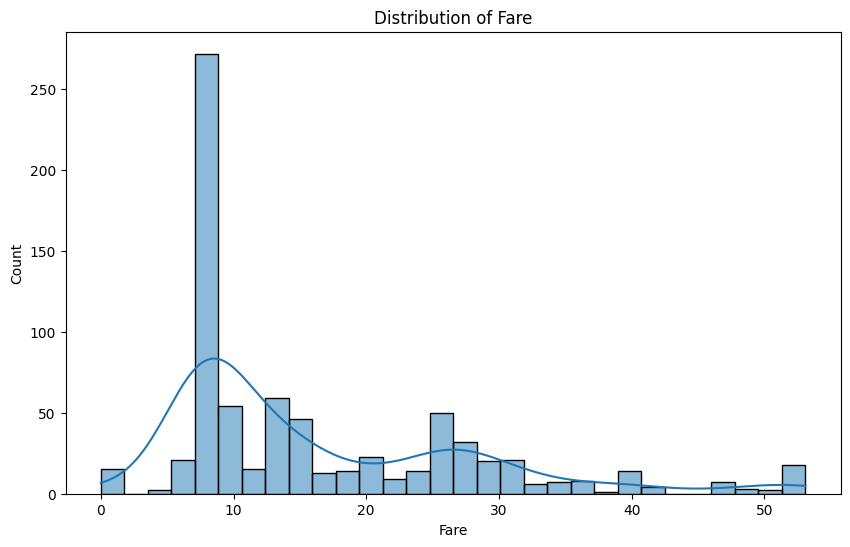

In [ ]:
# วิเคราะห์ตัวเเปร Fare
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Distribution of Fare')
plt.show()


กราฟที่แสดงคือ **ฮิสโตแกรม** (Histogram) ที่แสดงถึงการกระจายตัวของค่าโดยสาร (Fare) ของผู้โดยสารบนเรือไททานิก

**อธิบาย:**

* แกน x แสดงช่วงค่าโดยสาร (Fare) โดยแบ่งเป็นช่วงๆ (bins)
* แกน y แสดงถึงจำนวนผู้โดยสารในแต่ละช่วงค่าโดยสาร
* เส้นโค้งสีเหลือง (KDE) แสดงถึงความหนาแน่นของการกระจายตัวของค่าโดยสาร

**จากกราฟ:**

* เราสามารถสังเกตเห็นว่าค่าโดยสารส่วนใหญ่อยู่ในช่วงราคาที่ต่ำ
* มีผู้โดยสารจำนวนมากที่จ่ายค่าโดยสารในระดับต่ำ
* มีผู้โดยสารจำนวนน้อยที่จ่ายค่าโดยสารในระดับสูง


**โดยสรุป:** ฮิสโตแกรมนี้ช่วยให้เราเห็นภาพรวมของการกระจายตัวของค่าโดยสารผู้โดยสารบนเรือไททานิก ซึ่งเป็นข้อมูลที่สำคัญในการวิเคราะห์ข้อมูลต่อไป เช่น การวิเคราะห์ความสัมพันธ์ระหว่างค่าโดยสารกับการรอดชีวิต หรือการวิเคราะห์กลุ่มผู้โดยสารตามระดับค่าโดยสาร

# การวิเคราะห์ตัวแปรคู่ (Bivariate Analysis)


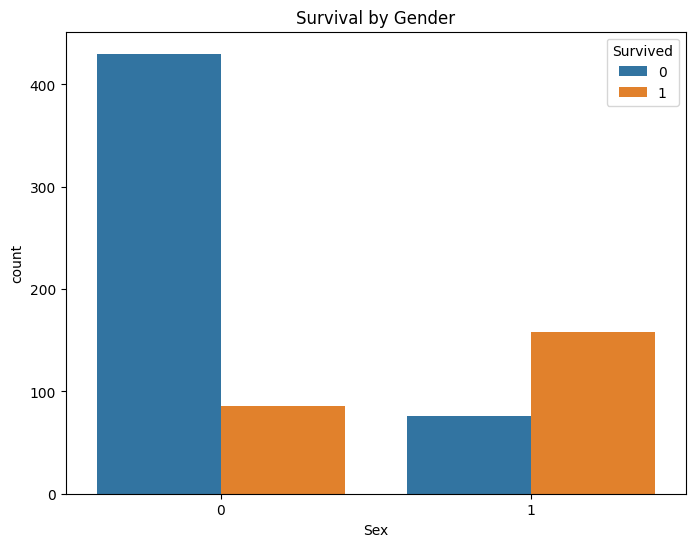

In [ ]:
#เพศ (Sex) กับการรอดชีวิต (Survived):
# การนับจำนวนผู้รอดชีวิตแยกตามเพศ
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()


กราฟ "Survival by Gender" แสดงถึงความสัมพันธ์ระหว่างเพศ (Sex) กับการรอดชีวิต (Survived) บนเรือไททานิก โดยใช้กราฟแท่ง (Bar Chart)

**แกน X:** แสดงเพศของผู้โดยสาร (Male หรือ Female)
**แกน Y:** แสดงจำนวนผู้โดยสาร
**สีของแท่ง:**
   - สีน้ำเงิน แทนผู้โดยสารที่เสียชีวิต (Survived = 0)
   - สีส้ม แทนผู้โดยสารที่รอดชีวิต (Survived = 1)

จากกราฟจะเห็นว่าผู้หญิง (Female) มีอัตราการรอดชีวิตสูงกว่าผู้ชาย (Male) อย่างเห็นได้ชัด  มีผู้หญิงจำนวนมากที่รอดชีวิตมากกว่าผู้ชายที่รอดชีวิต  ซึ่งหมายความว่าในเหตุการณ์เรือไททานิกจม  ผู้หญิงได้รับการช่วยเหลือให้รอดชีวิตมากกว่าผู้ชาย  

**สรุป:**  กราฟนี้แสดงให้เห็นว่าเพศเป็นปัจจัยสำคัญที่มีผลต่อการรอดชีวิตจากเหตุการณ์เรือไททานิกจม  โดยผู้หญิงมีโอกาสที่จะรอดชีวิตมากกว่าผู้ชาย

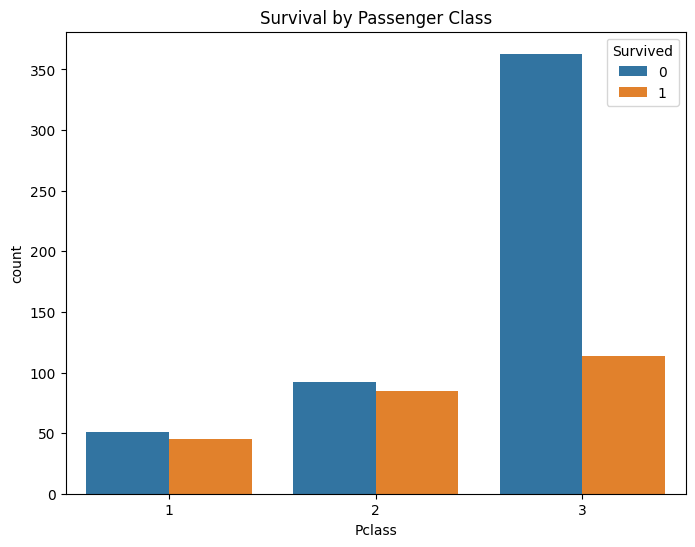

In [ ]:
#ชั้นโดยสาร (Pclass) กับการรอดชีวิต:

plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()


**กราฟ "Survival by Passenger Class"** แสดงให้เห็นถึงความสัมพันธ์ระหว่างชั้นโดยสาร (Pclass) กับการรอดชีวิต (Survived) ของผู้โดยสารบนเรือไททานิก โดยใช้กราฟแท่ง (Bar Chart)


* **แกน X:** แสดงชั้นโดยสาร (Pclass) โดย 1 คือชั้นโดยสารสูงสุด, 2 คือชั้นโดยสารระดับกลาง, และ 3 คือชั้นโดยสารต่ำสุด
* **แกน Y:** แสดงจำนวนผู้โดยสาร
* **สีของแท่ง:**
    * สีน้ำเงิน แทนผู้โดยสารที่เสียชีวิต (Survived = 0)
    * สีส้ม แทนผู้โดยสารที่รอดชีวิต (Survived = 1)


จากกราฟจะเห็นว่า:


1. **ผู้โดยสารชั้น 1 (Pclass = 1):** มีอัตราการรอดชีวิตสูงกว่าชั้นอื่นๆ  หมายความว่าผู้โดยสารชั้นสูงสุดมีโอกาสรอดชีวิตสูงกว่า
2. **ผู้โดยสารชั้น 3 (Pclass = 3):** มีอัตราการเสียชีวิตสูงกว่าชั้นอื่นๆ  หมายความว่าผู้โดยสารชั้นต่ำสุดมีโอกาสเสียชีวิตสูงกว่า
3. **ผู้โดยสารชั้น 2 (Pclass = 2):** อยู่ระหว่างชั้น 1 และ 3 ในแง่ของอัตราการรอดชีวิต



**สรุป:**


กราฟนี้แสดงให้เห็นว่าชั้นโดยสารเป็นปัจจัยสำคัญที่มีผลต่อการรอดชีวิตจากเหตุการณ์เรือไททานิกจม  ผู้โดยสารในชั้นโดยสารที่สูงกว่ามีโอกาสที่จะรอดชีวิตมากกว่า  ซึ่งอาจเป็นเพราะพวกเขามีทรัพยากรและการเข้าถึงสิ่งอำนวยความสะดวกที่ดีกว่า  รวมถึงอาจได้รับการช่วยเหลือเป็นพิเศษในสถานการณ์ฉุกเฉินด้วย

# การวิเคราะห์ความสัมพันธ์ (Correlation Analysis)


In [ ]:
# สร้าง correlation matrix
plt.figure(figsize=(10, 6))
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()


<Figure size 1000x600 with 0 Axes>

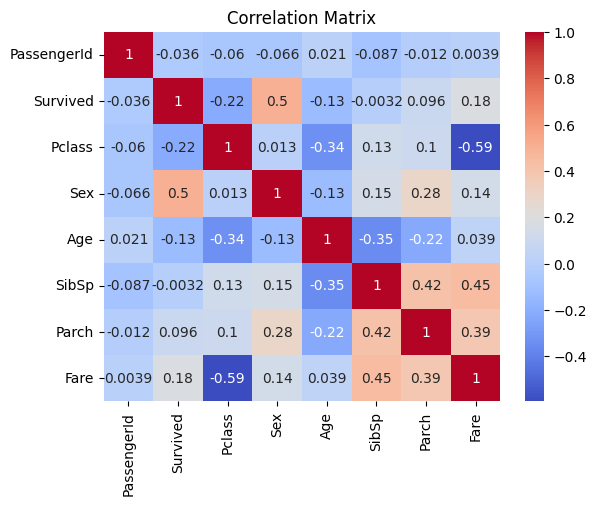

In [ ]:
# วาด heatmap ของความสัมพันธ์
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## การวิเคราะห์ความสัมพันธ์ระหว่างตัวแปรหลายตัว (Multivariate Analysis)
ในขั้นตอนนี้เราสามารถดูความสัมพันธ์หลายตัวแปรพร้อมกันได้ เช่น อายุ, ค่าโดยสาร, และ การรอดชีวิต

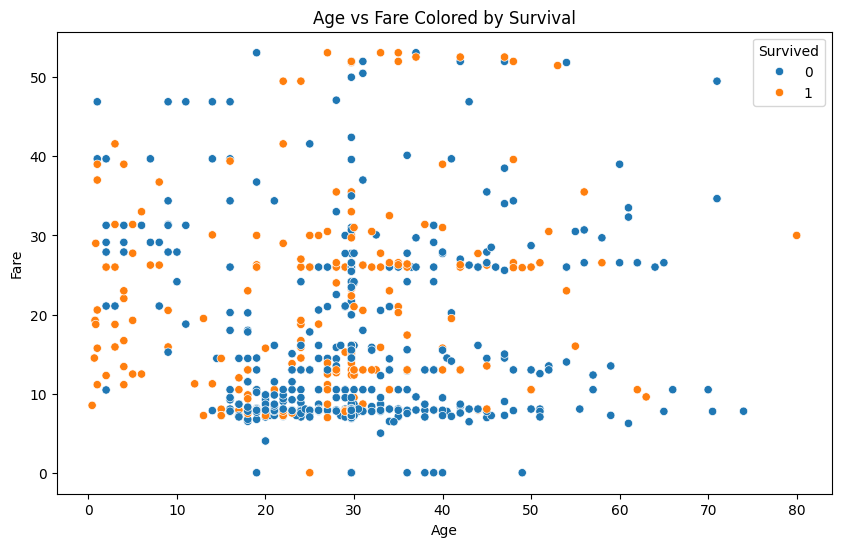

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Age vs Fare Colored by Survival')
plt.show()

**กราฟนี้แสดงถึงความสัมพันธ์ระหว่างอายุ (Age) และค่าโดยสาร (Fare) ของผู้โดยสารบนเรือไททานิก โดยแยกสีตามการรอดชีวิต (Survived):**


* **แกน X:** แสดงอายุ (Age) ของผู้โดยสาร
* **แกน Y:** แสดงค่าโดยสาร (Fare) ของผู้โดยสาร
* **สี:**
    * สีส้ม: ผู้โดยสารที่รอดชีวิต (Survived = 1)
    * สีน้ำเงิน: ผู้โดยสารที่เสียชีวิต (Survived = 0)


**จากกราฟ:**


* **ผู้โดยสารที่มีค่าโดยสารสูง (Fare สูง) ส่วนใหญ่มีอายุค่อนข้างมาก:** เราสามารถเห็นกลุ่มผู้โดยสารที่จ่ายค่าโดยสารสูงอยู่บริเวณด้านบนของกราฟ  และกลุ่มนี้มีอายุค่อนข้างมาก (มากกว่า 50 ปี)
* **ผู้โดยสารที่รอดชีวิต (สีส้ม) มีแนวโน้มที่จะมีค่าโดยสารสูงกว่า:** เราจะเห็นว่าผู้โดยสารที่รอดชีวิตหลายคนอยู่บริเวณด้านบนของกราฟ (ค่าโดยสารสูง) ซึ่งอาจบ่งชี้ว่าผู้โดยสารที่มีค่าโดยสารสูงมีโอกาสที่จะรอดชีวิตมากกว่า  
* **ผู้โดยสารที่อายุน้อย (Age ต่ำ) และจ่ายค่าโดยสารน้อย (Fare ต่ำ) มีแนวโน้มที่จะเสียชีวิตมากกว่า:** เราจะเห็นกลุ่มผู้โดยสารที่อายุน้อยและจ่ายค่าโดยสารน้อยอยู่บริเวณด้านล่างซ้ายของกราฟ  และกลุ่มนี้มีแนวโน้มที่จะเสียชีวิตมากกว่า


# การสร้างโมเดล Logistic Regression:

### 1. เตรียมข้อมูลสำหรับการทำนาย
ก่อนที่จะสร้างโมเดล เราต้องจัดการข้อมูลให้พร้อมสำหรับการทำนาย เช่น แปลงข้อมูล categorical (ประเภทข้อความ) ให้เป็นตัวเลข (One-Hot Encoding) และแบ่งข้อมูลออกเป็นชุดการฝึก (training set) และชุดทดสอบ (testing set)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C


# สร้างโมเดล Logistic Regression:


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# เลือกคอลัมน์ที่ใช้ในการทำนาย (Features) และคอลัมน์เป้าหมาย (Target)
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]  # เลือกเฉพาะตัวแปรที่มีผลต่อการรอดชีวิต
y = df['Survived']  # เป้าหมายคือการทำนายการรอดชีวิต

# แปลงตัวแปร categorical ให้เป็นตัวเลข (One-Hot Encoding)
X = pd.get_dummies(X, columns=['Pclass', 'Embarked'])

# แบ่งข้อมูลออกเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# เลือกเฉพาะคอลัมน์เชิงตัวเลขที่ต้องการทำ StandardScaler
numeric_features = ['Age', 'Fare']  # ตัวอย่างคอลัมน์เชิงตัวเลขที่ต้องการ normalize

# ทำการ normalize เฉพาะคอลัมน์เชิงตัวเลข
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# สร้างโมเดล Logistic Regression และเพิ่ม max_iter เพื่อหลีกเลี่ยงปัญหา convergence
model = LogisticRegression(max_iter=1000)

# ฝึกโมเดลด้วยข้อมูล training set
model.fit(X_train, y_train)

# ทำนายผลด้วยชุดทดสอบ
y_pred = model.predict(X_test)

# คำนวณความแม่นยำ (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# ดู confusion matrix และ classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 79.33%
Confusion Matrix:
[[99 13]
 [18 20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       112
           1       0.61      0.53      0.56        38

    accuracy                           0.79       150
   macro avg       0.73      0.71      0.71       150
weighted avg       0.79      0.79      0.79       150



# สร้าง Model เป็น RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# ลองใช้ Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# ประเมินผลลัพธ์ของ Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

# ดู confusion matrix และ classification report ของ  Random Forest
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))



Random Forest Accuracy: 79.33%
Random Forest Confusion Matrix:
[[98 14]
 [17 21]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       112
           1       0.60      0.55      0.58        38

    accuracy                           0.79       150
   macro avg       0.73      0.71      0.72       150
weighted avg       0.79      0.79      0.79       150

